## This is a very simple application of how we can work with data in general. We will examine in this kernel how we can control each of the following
- Exploratory analysis
- Supporting decision-making (Where is the Value ?)
- Customer classification and recommendation systems
- Practical application on how to utilize the outputs of predictive models in business development

### The objectives of this core are not just educational about how you can deal with data in general but how to take advantage of your dealings with those data in real and effective employment in the development and acceleration of business growth

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
from sklearn.cluster import KMeans



# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['Mall_Customers.csv']


In [2]:
df=pd.read_csv('../input/Mall_Customers.csv')

In [3]:
df.shape

(200, 5)

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.drop(['CustomerID'],axis=1,inplace=True)

In [8]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [9]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

Possible relationships once observed:
In this process we will discover patterns by vision. This process may be difficult if it is the first time that this method is used, but with the training and reading many will be able to do it
- Relationship between age and spending rate
- Relationship between gender and spending rate
- Relationship between age and gender
- The relationship between sex and the rate of spending and age

When we choose those patterns, we answer one question:
How can we create value from those patterns?
If you do not find an answer to this question, the pattern you have chosen is an ambiguous pattern

For example, when using age and spending rate it is necessary to consider the quality of the elements where older people tend to buy valuable items of high quality and so on ..

In [10]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

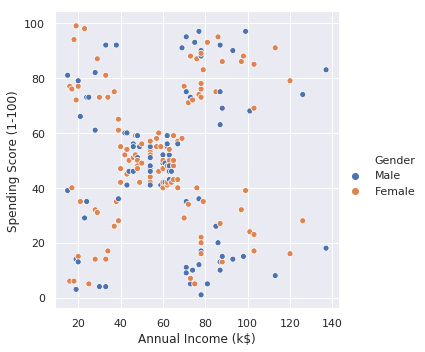

In [11]:
sns.relplot(hue="Gender", x='Annual Income (k$)' ,y="Spending Score (1-100)", data=df);


For example, at this point, we notice that men have an annual salary of more than $ 80,000. However, the highest annual expenditure rate was women. It is equivalent to 60 per year. Well, one thing we will notice is that women spend 50-60. Their annual income is in the same range<br>
<b>Well, in fact, women generally do not buy anything expensive, just clothes. If it was a clothing store, it's very interesting. Do not worry about putting on your fancy clothes. They will make money if they want something.
But if this store is for non-clothing, you have to offer things that are moderately priced, especially if it is a store related to household items. Eventually, women will buy these items.<b>

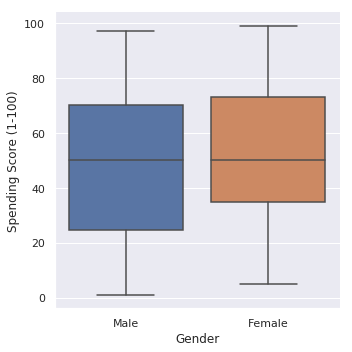

In [12]:
sns.catplot(x="Gender", y="Spending Score (1-100)", kind="box", data=df);


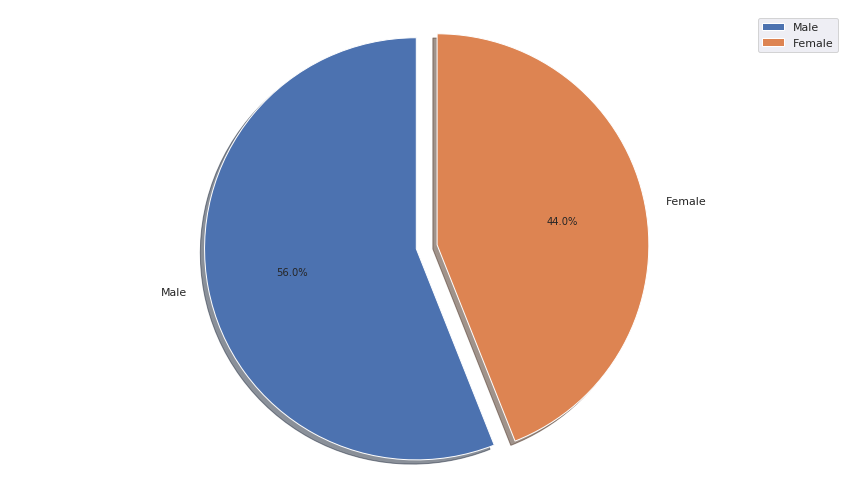

In [13]:
explode = (0.1, 0)
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(df['Gender'].value_counts(),explode=explode, labels=df['Gender'].unique(), autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

The first point is that the rate of exchange of men is greater than the rate of women's exchange. The number of men is estimated at 56% of the total number of visitors to the store. In fact, do not consider this simple difference in the number not to be any real value. **The information that may be valuable is that we should care about men Because their purchases go up**

I'm always looking to turn anything in front of me to be self-driving. Put it in our world. Do not write something twice. Well, **I'll make it BOLD too. Because that information is valuable to you.**

In [14]:
def pieChart(label):
    fig1, ax1 = plt.subplots(figsize=(12,7))
    ax1.pie(df[label].value_counts(), labels=df[label].unique(), autopct='%1.1f%%',
            shadow=True, startangle=90)
    # Equal aspect ratio ensures that pie is drawn as a circle
    ax1.axis('equal')  
    plt.tight_layout()
    plt.legend()
    plt.show()

Let's Try it again , sure it's working

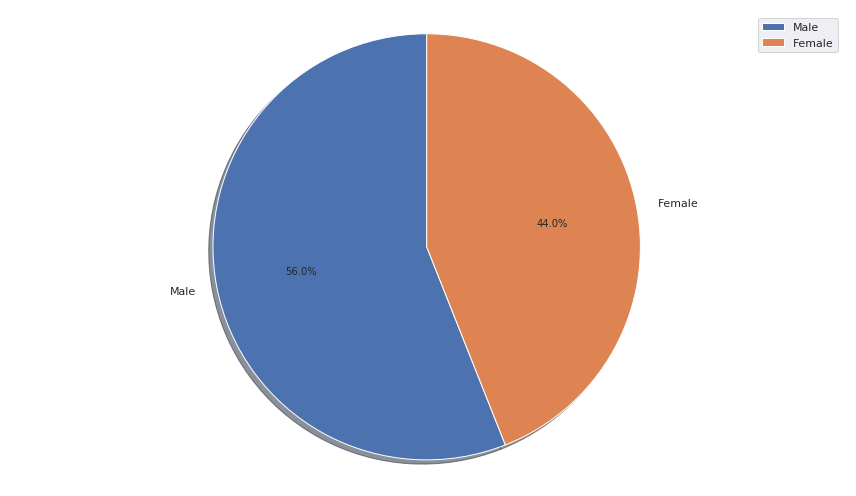

In [15]:
pieChart('Gender')

You have to remember that we always have to make everything automated so do not worry, they can not doing anything without the automated maker in the companies that they want to make more of it and you do not waste 5 minutes every day to find out how to draw pieChart with python it's so hard to find it every time and stop to save alot of functions and methods into your brain .. ** you're data scientist right now just learn how to automate everything even you too.**

I can make great visualization but the stakeholders do not understand what they mean. They always care about one thing and ask about it. Where is the value? Where is the value? Where is the value?
Well we will bring them value instead of using millions of brilliant visualization and we do not know how to bring to the store one extra dollar of our report

## Clustering and Recommendation System 

In [16]:
X1 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

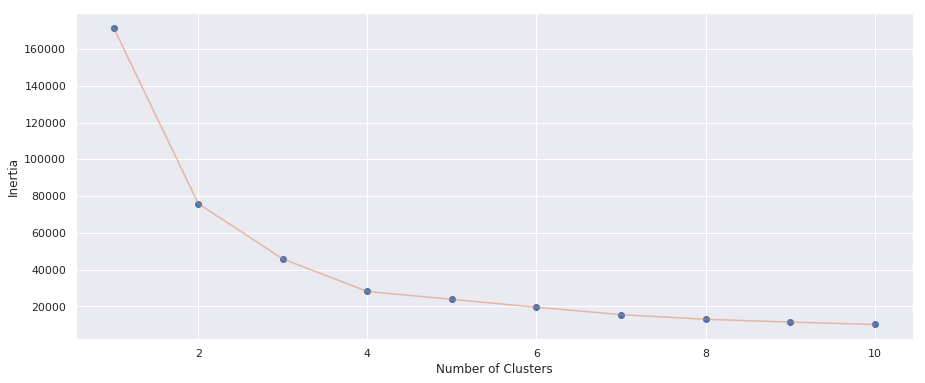

In [17]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [18]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [19]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

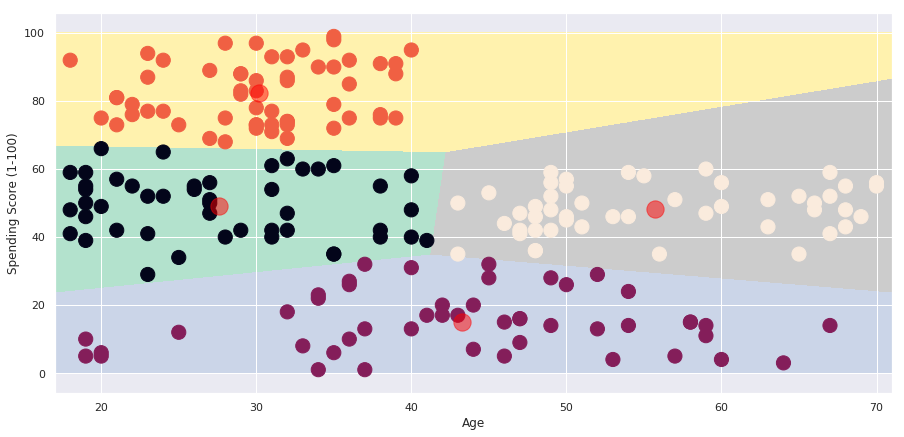

In [20]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

We used the above example two factors affecting the sale process, which may have a significant impact on customers The goal of this process is to teach you how to Clustering and classification, we will complete the Kernel yourself and here are some points that need to be trained ..
How can we predict the purchasing power of the client based on some of the factors presented (Regression)
and based on that statistic we will display a range of products suitable for the category to which the client will buy it .